In [1]:
import open3d as o3d
import numpy as np
import os
import sys

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

# Point cloud outlier removal
When collecting data from scanning devices, the resulting point cloud tends to contain noise and artifacts that one would like to remove. This tutorial addresses the outlier removal features of Open3D.

## Prepare input data
A point cloud is loaded and downsampled using `voxel_downsample`.

Load a ply point cloud, print it, and render it


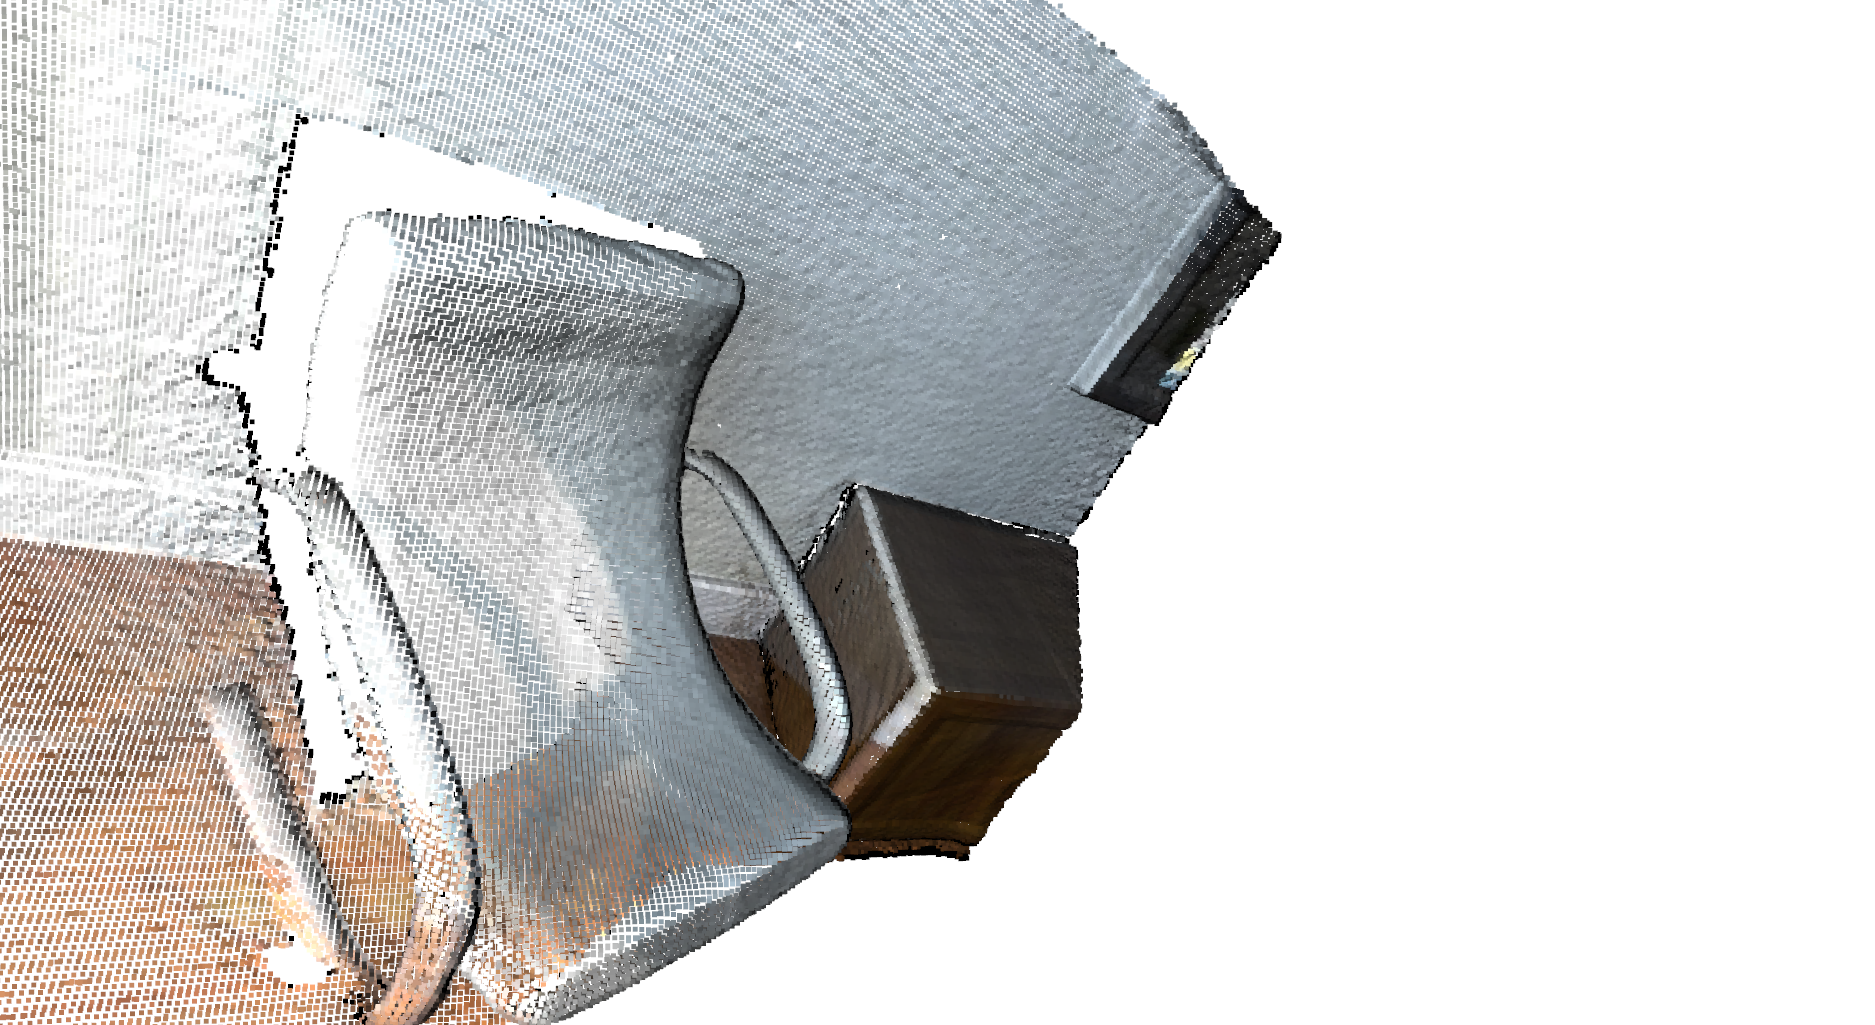

Downsample the point cloud with a voxel of 0.02


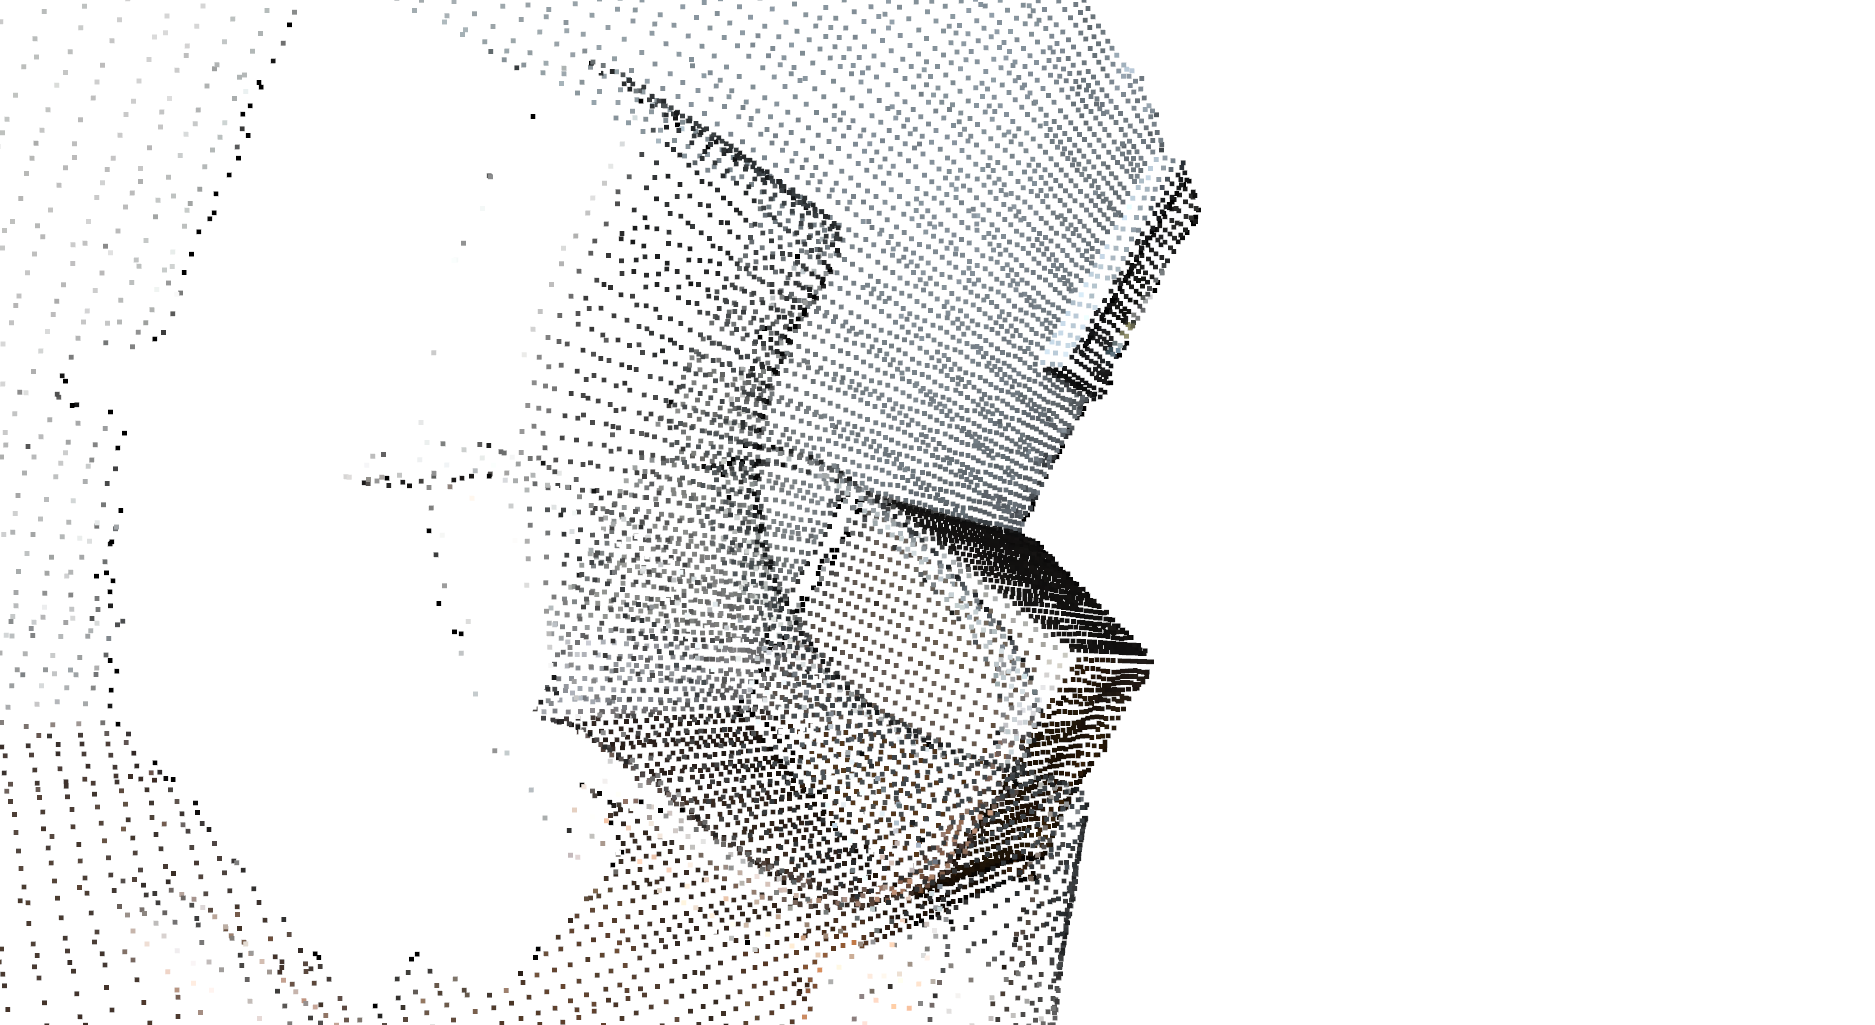

In [2]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("../../test_data/ICP/cloud_bin_2.pcd")
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

print("Downsample the point cloud with a voxel of 0.02")
voxel_down_pcd = pcd.voxel_down_sample(voxel_size=0.02)
o3d.visualization.draw_geometries([voxel_down_pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Alternatively, use `uniform_down_sample` to downsample the point cloud by collecting every n-th points.

Every 5th points are selected


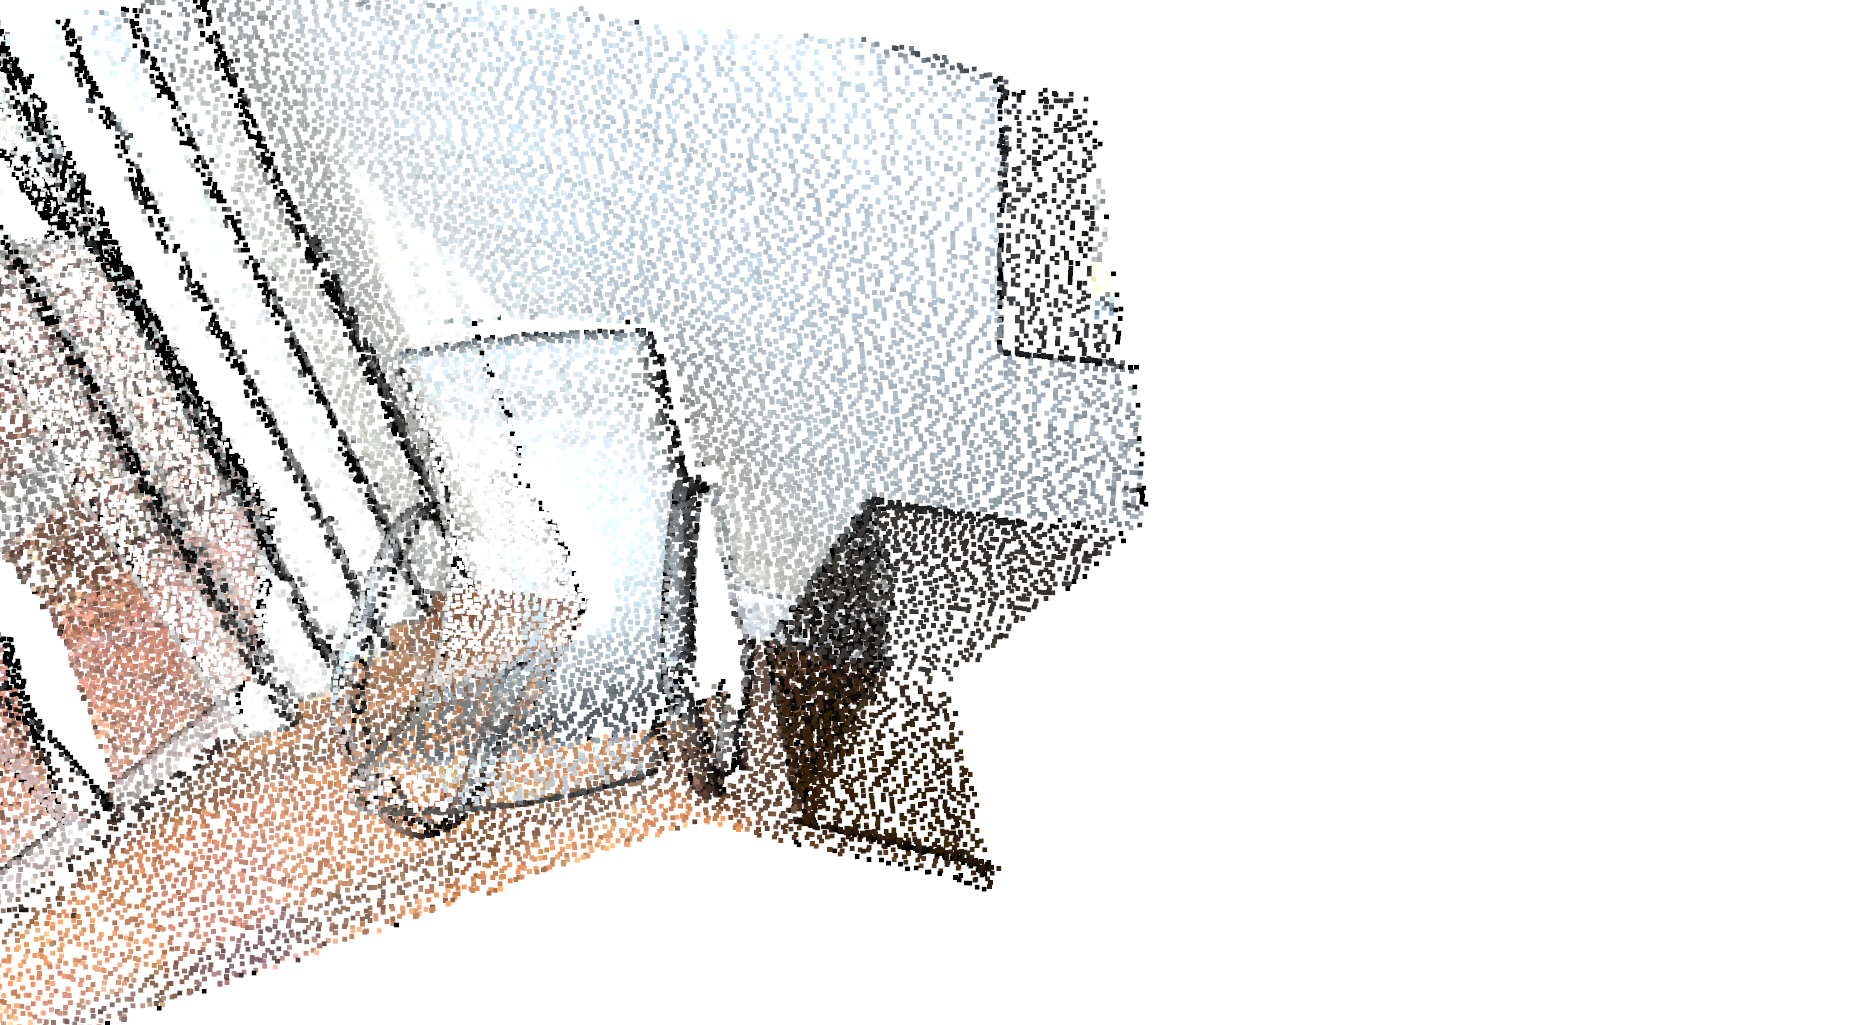

In [3]:
print("Every 5th points are selected")
uni_down_pcd = pcd.uniform_down_sample(every_k_points=5)
o3d.visualization.draw_geometries([uni_down_pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

## Select down sample
The following helper function uses `select_by_index`, which takes a binary mask to output only the selected points. The selected points and the non-selected points are visualized.

In [4]:
def display_inlier_outlier(cloud, ind):
    inlier_cloud = cloud.select_by_index(ind)
    outlier_cloud = cloud.select_by_index(ind, invert=True)

    print("Showing outliers (red) and inliers (gray): ")
    outlier_cloud.paint_uniform_color([1, 0, 0])
    inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
    o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                      zoom=0.3412,
                                      front=[0.4257, -0.2125, -0.8795],
                                      lookat=[2.6172, 2.0475, 1.532],
                                      up=[-0.0694, -0.9768, 0.2024])

## Statistical outlier removal
`statistical_outlier_removal` removes points that are further away from their neighbors compared to the average for the point cloud. It takes two input parameters:

- `nb_neighbors`, which specifies how many neighbors are taken into account in order to calculate the average distance for a given point.
- `std_ratio`, which allows setting the threshold level based on the standard deviation of the average distances across the point cloud. The lower this number the more aggressive the filter will be.

Statistical oulier removal
Showing outliers (red) and inliers (gray): 


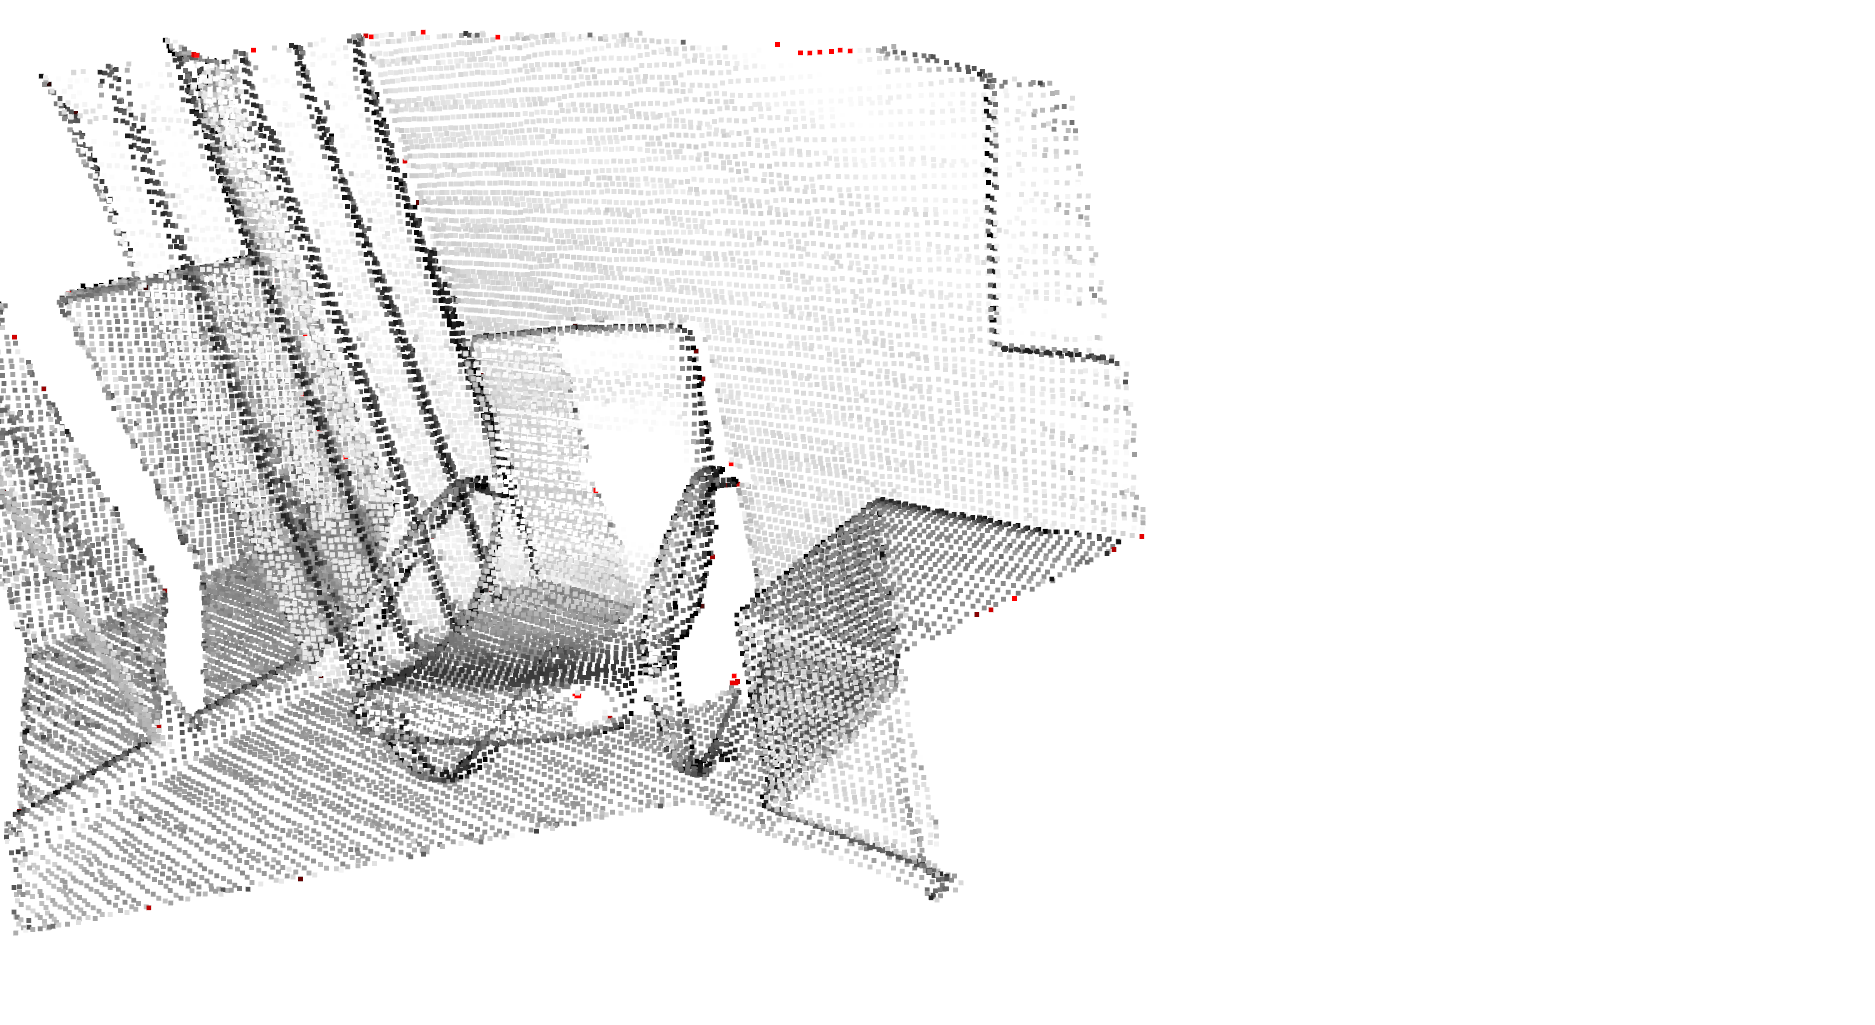

In [5]:
print("Statistical oulier removal")
cl, ind = voxel_down_pcd.remove_statistical_outlier(nb_neighbors=20,
                                                    std_ratio=2.0)
display_inlier_outlier(voxel_down_pcd, ind)

## Radius outlier removal
`radius_outlier_removal` removes points that have few neighbors in a given sphere around them. Two parameters can be used to tune the filter to your data:

- `nb_points`, which lets you pick the minimum amount of points that the sphere should contain.
- `radius`, which defines the radius of the sphere that will be used for counting the neighbors.

Radius oulier removal
Showing outliers (red) and inliers (gray): 


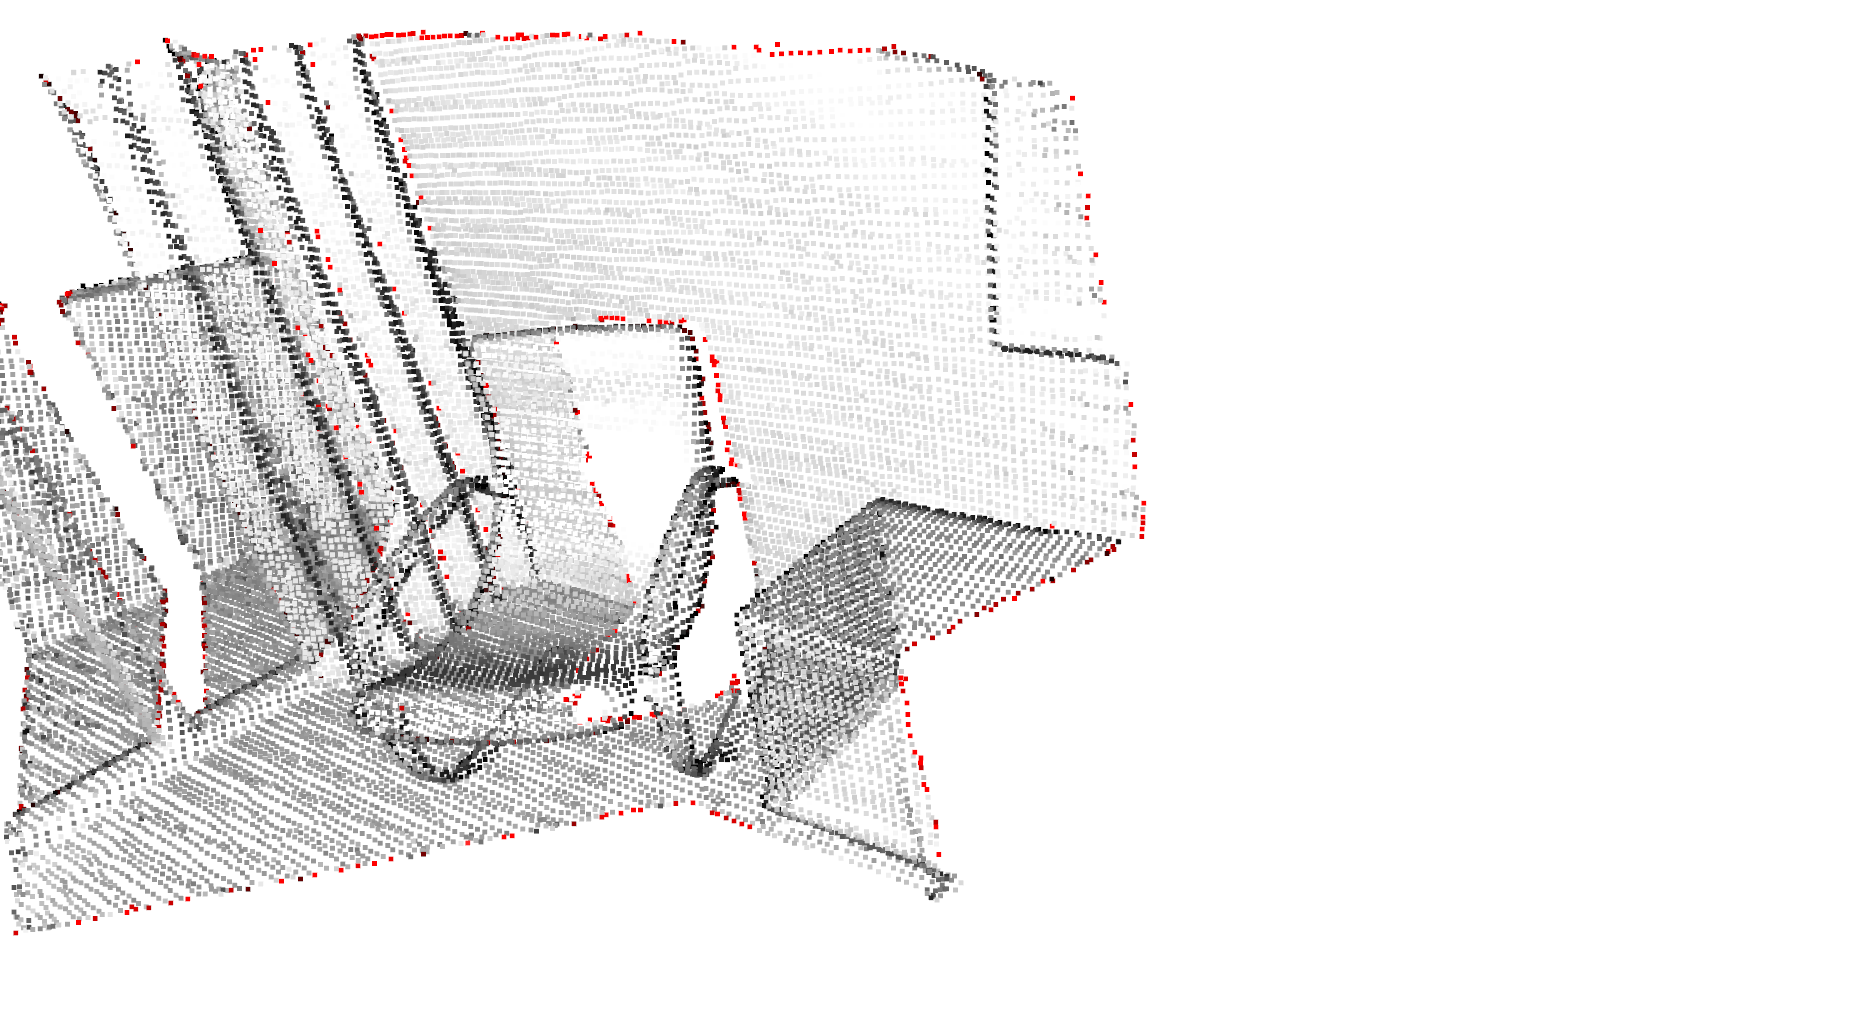

In [6]:
print("Radius oulier removal")
cl, ind = voxel_down_pcd.remove_radius_outlier(nb_points=16, radius=0.05)
display_inlier_outlier(voxel_down_pcd, ind)